In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date  
from datetime import timedelta  
from sklearn import preprocessing
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

## definitions

In [2]:
def getFeatures(a):
    min = np.amin(a)
    max = np.amax(a)
    mean = np.mean(a)
    std = np.std(a)
    return min, max, mean, std

def getEDAStats(a):
    skewness = skew(a)
    kurt = kurtosis(a)
    return skewness, kurt

In [3]:
user='DF'

## combiner

In [4]:
importPath=f'C:\\Users\\TSA\\Desktop\\Summer2020\\stress_Summer_2020\\OGH\\{user}'
exportPath = f'C:\\Users\\TSA\\Desktop\\Summer2020\\stress_Summer_2020\\OGH\\{user}'

In [5]:
rightedaDataPath = importPath+'\\EDA.csv'
righthrDatapath = importPath+'\\HR.csv'
righttempDatapath = importPath+'\\TEMP.csv'

In [6]:
rightedaData = np.loadtxt(rightedaDataPath, delimiter=',')
righthrData = np.loadtxt(righthrDatapath, delimiter= ',')
righttempData = np.loadtxt(righttempDatapath, delimiter= ',')
righthrData= np.repeat(righthrData,4)
np.savetxt('righthrData.csv', righthrData, delimiter=',') 
np.savetxt('rightedaData.csv', rightedaData, delimiter=',')
np.savetxt('righttempData.csv', righttempData, delimiter=',')

In [7]:
edat=pd.read_csv('rightedaData.csv',header=2)
hrt=pd.read_csv('righthrData.csv',header=12)
tempt=pd.read_csv('righttempData.csv',header=2)
gt=pd.read_csv('rightedaData.csv',header=None)
#print(gt.head())
generaltime=gt.iloc[0,0]
print(generaltime)
a=min(len(edat),len(hrt),len(tempt))
print(a)
edat=edat.iloc[3:a,:]
hrt=hrt.iloc[3:a,:]
tempt=tempt.iloc[3:a,:]

1617137900.0
22863


In [8]:
edat['hr'] = hrt
edat['temp'] = tempt
edat.head()

,0.000000000000000000e+00,hr,temp
3,0.453509,69.67,34.18
4,0.430450,69.67,34.18
5,0.385611,69.67,34.18
6,0.352302,69.67,34.18
7,0.426606,73.50,34.15


In [9]:
print(user)
#data_original = pd.read_csv((importPath+user+'.csv'))
data_original = edat
array = data_original.values
#scalar = preprocessing.MinMaxScaler()
#x_scaled = scalar.fit_transform(array)
data = pd.DataFrame(array)
data.columns = ['EDA','HR','temp']
length = len(data['EDA'])
fdf = pd.DataFrame(columns=['EDA_Mean','EDA_Min','EDA_Max','EDA_Std', 'EDA_Kurtosis','EDA_Skew','EDA_Num_Peaks','EDA_Amphitude','EDA_Duration','HR_Mean','HR_Min','HR_Max','HR_Std','HR_RMS','temp_Mean','temp_Min','temp_Max','temp_Std'])
index = 0
for i in range(0,length, 20):
    partialDF = data.iloc[i:i+40,]
    plen = len(partialDF['EDA'])


    if plen < 40:
        continue

    eda = partialDF['EDA'].values
    hr = partialDF['HR'].values
    temp = partialDF['temp'].values

    eda_min, eda_max, eda_mean, eda_std = getFeatures(eda)
    hr_min, hr_max, hr_mean, hr_std = getFeatures(hr)
    temp_min, temp_max, temp_mean, temp_std = getFeatures(temp)
    eda_skew, eda_kurtosis = getEDAStats(eda)
    hr_rms = np.sqrt(np.mean(np.square(np.ediff1d(hr))))
    temp_rms= np.sqrt(np.mean(np.square(np.ediff1d(temp))))


    peaks,properties = find_peaks(eda, width=5)
    num_Peaks = len(peaks)
    prominences = np.array(properties['prominences'])
    widths = np.array(properties['widths'])
    amphitude = np.sum(prominences)
    duration = np.sum(widths)

    


    fdf.loc[index] = [eda_mean, eda_min, eda_max, eda_std, eda_kurtosis, eda_skew, num_Peaks, amphitude, duration, hr_mean, hr_min, hr_max, hr_std,hr_rms, temp_mean, temp_min, temp_max, temp_std]

    index = index+1

fdf.to_csv(('notscaled'+user+'.csv'),index=False)

DF


In [10]:
df=pd.read_csv('notscaled'+user+'.csv')
df.head()

,EDA_Mean,EDA_Min,EDA_Max,EDA_Std,EDA_Kurtosis,EDA_Skew,EDA_Num_Peaks,EDA_Amphitude,EDA_Duration,HR_Mean,HR_Min,HR_Max,HR_Std,HR_RMS,temp_Mean,temp_Min,temp_Max,temp_Std
0,0.518872,0.289795,0.799673,0.099022,0.306888,0.300115,1.0,0.023059,5.333276,105.416,69.67,136.00,24.529179,4.253031,34.194,34.13,34.25,0.040546
1,0.536855,0.289795,0.622881,0.065555,3.099069,-1.534156,1.0,0.102488,14.831965,134.514,115.50,144.18,9.030825,1.846512,34.180,34.13,34.25,0.036606
2,0.524685,0.474274,0.583167,0.028417,-0.876903,0.272496,2.0,0.080710,13.178559,142.463,138.23,144.18,1.857262,0.579929,34.158,34.13,34.18,0.017776
3,0.502938,0.474274,0.521674,0.012512,-0.977635,-0.188274,2.0,0.066617,14.016685,140.730,136.44,144.00,2.729978,0.449689,34.159,34.13,34.18,0.015780
4,0.483626,0.446090,0.520393,0.022642,-1.274910,-0.026586,1.0,0.033308,8.171460,136.415,133.53,140.22,2.133163,0.370035,34.158,34.15,34.18,0.008718


In [11]:
dataframe=pd.DataFrame(columns=['30','29','28','27','26','25','24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1'])
dataframe = pd.concat([df['EDA_Mean'].shift(30), df['EDA_Mean'].shift(29),df['EDA_Mean'].shift(28),
                      df['EDA_Mean'].shift(27), df['EDA_Mean'].shift(26),df['EDA_Mean'].shift(25),
                      df['EDA_Mean'].shift(24), df['EDA_Mean'].shift(23),df['EDA_Mean'].shift(22),
                      df['EDA_Mean'].shift(21), df['EDA_Mean'].shift(20),df['EDA_Mean'].shift(19),
                      df['EDA_Mean'].shift(18), df['EDA_Mean'].shift(17),df['EDA_Mean'].shift(16),
                      df['EDA_Mean'].shift(15), df['EDA_Mean'].shift(14),df['EDA_Mean'].shift(13),
                      df['EDA_Mean'].shift(12), df['EDA_Mean'].shift(11),df['EDA_Mean'].shift(10),
                      df['EDA_Mean'].shift(9), df['EDA_Mean'].shift(8),df['EDA_Mean'].shift(7),
                      df['EDA_Mean'].shift(6), df['EDA_Mean'].shift(5),df['EDA_Mean'].shift(4),
                      df['EDA_Mean'].shift(3), df['EDA_Mean'].shift(2),df['EDA_Mean'].shift(1)], axis=1)
dataframe.columns=columns=['30','29','28','27','26','25','24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1']
dataframe=dataframe.dropna()

In [12]:
dataframe.shape

(1112, 30)

In [13]:
df1=df.iloc[30:3238,0:31]
df=pd.concat([dataframe,df1],axis=1)

In [14]:
df.to_csv('combinedNS'+user+'.csv',index=False)

In [15]:
df=pd.read_csv('combined_lagEDA.csv')
train_set=df.iloc[:,0:48]
labels=df.iloc[:,48:49]
print(train_set.shape)
print(labels.shape)

(12445, 48)
(12445, 1)


In [16]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=15)

# Split our data
train, test, train_labels, test_labels = train_test_split(train_set,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=30)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train,train_labels)

y_pred=clf.predict(test)
    #print(accuracy_score(test_labels, y_pred))
f1score=f1_score(test_labels, y_pred, average="macro")
recall=recall_score(test_labels, y_pred, average="macro")
precision=precision_score(test_labels, y_pred, average="macro")
accuracy=accuracy_score(test_labels, y_pred)
print('acc=',accuracy)
print('pre=',precision)
print('recall=',recall) 
print('f1',f1score)

C:\Users\TSA\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


acc= 0.95154614073533
pre= 0.9510498621957951
recall= 0.9334901891045808
f1 0.9411565030190694


In [17]:
df01=pd.read_csv('combinedNS'+user+'.csv')
scalar = preprocessing.MinMaxScaler()
x_scaled = scalar.fit_transform(df01)
data = pd.DataFrame(x_scaled)
data=data.fillna(0)
#partial_df=scalar.transform(df01.iloc[:,0:48])
pred_t=clf.predict(data)
pred_t=pd.DataFrame(pred_t)
pred_t.columns=['pred']
pred_t.head(30)
pred_t.to_csv('pred'+user+'.csv')

In [18]:
df01['pred']=pred_t
df01.to_csv('pred'+user+'.csv')
df01.head()

,30,29,28,27,26,25,24,23,22,21,...,HR_Mean,HR_Min,HR_Max,HR_Std,HR_RMS,temp_Mean,temp_Min,temp_Max,temp_Std,pred
0,0.518872,0.536855,0.524685,0.502938,0.483626,0.450637,0.449164,0.461110,0.456274,0.438531,...,102.085,100.98,103.40,0.780554,0.131031,33.843,33.83,33.87,0.014177,0.0
1,0.536855,0.524685,0.502938,0.483626,0.450637,0.449164,0.461110,0.456274,0.438531,0.412397,...,103.651,102.15,105.37,1.023889,0.173383,33.842,33.83,33.87,0.014697,0.0
2,0.524685,0.502938,0.483626,0.450637,0.449164,0.461110,0.456274,0.438531,0.412397,0.390170,...,105.481,103.75,107.07,1.075430,0.180313,33.851,33.83,33.87,0.015780,0.0
3,0.502938,0.483626,0.450637,0.449164,0.461110,0.456274,0.438531,0.412397,0.390170,0.375053,...,107.043,105.73,107.78,0.704671,0.132510,33.846,33.84,33.87,0.012000,0.0
4,0.483626,0.450637,0.449164,0.461110,0.456274,0.438531,0.412397,0.390170,0.375053,0.360000,...,107.683,107.38,107.78,0.104120,0.053253,33.842,33.83,33.87,0.009798,0.0


In [19]:
#plt.plot(df01.iloc[:,48:49])
df01['MA_3'] = np.ceil(df01.iloc[:,48:49].rolling(window=31).mean())
#plt.plot(df01['MA_3'])
#df01['MA_3'].head(100)


C:\Users\TSA\.conda\envs\tf\lib\site-packages\scipy\signal\_peak_finding.py:77: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, plus)
C:\Users\TSA\.conda\envs\tf\lib\site-packages\scipy\signal\_peak_finding.py:78: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, minus)


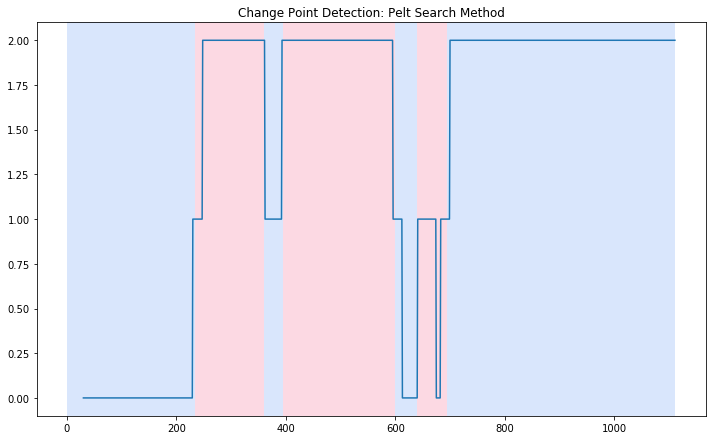

[235, 360, 395, 600, 640, 695, 1112]


In [20]:
import matplotlib.pyplot as plt
import ruptures as rpt
signal=df01.iloc[:,49:50].values
#algo = rpt.Pelt(model="l2").fit(signal)
algo = rpt.Window(model="l2", width=40).fit(signal)
result = algo.predict(n_bkps=30)
#result = algo.predict(pen=1)
rpt.display(signal, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()
print(result)
# detection
#

In [29]:
tempstart = 0
tempend = result[0]
#print(result)
stress = []
for i in range (len(result)-1):
    
    temp = df01.iloc[result[i]:(result[i+1]-1),48:49].mean()[0]
    
    if temp>1.6:
        temp = 2.0
    elif temp>=.65:
        temp = 1
    else:
        temp = 0
    #print(temp, result[i],(result[i+1]-1))
    #print(temp[0], temp.shape)
    stress.append(temp)
#print(len(result), len(stress))
tdf = pd.DataFrame(columns=['start', 'end', 'stress'])
dfi=0
stress = list(stress)
for i in range(len(result)-1):
    stressLength = (result[i+1]-result[i])/12
    #print(stressLength)
    startPoint = result[i]
    endPoint = result[i+1]
    stressval = stress[i] 
    j=1
    while(True):
        currbreak = i+j
        if((currbreak+1)<len(result)):
            nextStressLength = (result[currbreak+1]-result[currbreak])/12
            if(nextStressLength<=5):
                endPoint = result[currbreak+1]
                j = j+1
                #print(j)
            else:
                break
        else:
             break
    i = i+j+1
    #print(tempend,startPoint, endPoint)
    if tempend <= startPoint:
        tempend = endPoint
        print(startPoint, endPoint, stressval)
        tdf.loc[dfi] = [startPoint, endPoint, stressval]
        dfi = dfi +1
        
    #print(i)        
tdf.shape 

235 395 1
395 695 2.0
695 1112 2.0


(3, 3)

## DATE Time

In [30]:
from datetime import datetime
stressStart = 0
stressEnd = 0
tse =0
previousStress = -1
for index, row in tdf.iterrows():
    #print(row)
    if row['stress']==previousStress:
        stressEnd = row['end']
    else:
        if(previousStress!=-1):
            start = datetime.fromtimestamp(generaltime+stressStart*5)
            end = datetime.fromtimestamp(generaltime+stressEnd*5)
            timediff = end - start

            print(timediff, datetime.fromtimestamp(generaltime+stressStart*5), datetime.fromtimestamp(generaltime+stressEnd*5), previousStress)
        stressStart = row['start']
        stressEnd = row['end']
        previousStress = row['stress']
        #int(1586788313+result[i-1]*5
print(timediff, datetime.fromtimestamp(generaltime+stressStart*5), datetime.fromtimestamp(generaltime+stressEnd*5), previousStress)

0:13:20 2021-03-30 16:17:55 2021-03-30 16:31:15 1
0:13:20 2021-03-30 16:31:15 2021-03-30 17:31:00 2.0
